# Size Analysis
## 1. Sparse Dataset
### 1.1 Creating Sparse dataset

In [2]:
import os
import re
import pandas as pd
base_dir="/run/media/ramizouari/INTENSO/MPG/"
directory="/run/media/ramizouari/INTENSO/MPG/dataset/sparse"
sparse_dataset=[]
k=0
for file in os.listdir(directory):
    match=re.search(R"gnp_uniform_mpg_(\d+)_(\d+)_(\d+)(\.edgelist\.gz)",file)
    if match:
        n=int(match.group(1))
        c=int(match.group(2))
        extension=match.group(4)
        sparse_dataset.append(dict(filename=match.group(0),size=os.path.getsize(os.path.join(directory,file))))
sparse_dataset=pd.DataFrame(sparse_dataset,columns=["filename","size"])
sparse_benchmark=pd.read_csv("/run/media/ramizouari/INTENSO/MPG/benchmark_gnp_random_mpg_sparse.csv")
sparse_benchmark["filename"]=sparse_benchmark["filename"].map(lambda x : x.rstrip(".gpickle"))
sparse_benchmark
sparse_dataset["filename"]=sparse_dataset["filename"].map(lambda x : x.rstrip(".edgelist.gz"))
sparse_dataset=sparse_dataset.merge(sparse_benchmark,on="filename")


FileNotFoundError: [Errno 2] No such file or directory: '/run/media/ramizouari/INTENSO/MPG/dataset/sparse'

### 1.2 Sample from Sparse Dataset

In [417]:
sparse_dataset.sample(10)

,filename,size,n,c,p,execution_start,execution_end,time,nodes,edges,distribution,log n
223,gnp_uniform_mpg_36_5_3,481,36,5,0.138889,2023-03-09 11:53:14.590952,2023-03-09 11:53:14.592343,0.001393,36,164,"integers(-1,1)",1.556303
139,gnp_uniform_mpg_16_7_9,327,16,7,0.437500,2023-03-09 11:53:14.199578,2023-03-09 11:53:14.200417,0.000839,16,116,"integers(-1,1)",1.204120
3584,gnp_uniform_mpg_5329_7_4,148153,5329,7,0.001314,2023-03-09 12:00:58.410425,2023-03-09 12:00:58.672898,0.262472,5329,37179,"integers(-1,1)",3.726646
1383,gnp_uniform_mpg_841_7_3,20478,841,7,0.008323,2023-03-09 11:53:43.605472,2023-03-09 11:53:43.645309,0.039836,841,5977,"integers(-1,1)",2.924796
4246,gnp_uniform_mpg_7396_9_6,267775,7396,9,0.001217,2023-03-09 12:06:01.052597,2023-03-09 12:06:01.493954,0.441357,7396,66732,"integers(-1,1)",3.868997
364,gnp_uniform_mpg_81_3_4,785,81,3,0.037037,2023-03-09 11:53:15.434572,2023-03-09 11:53:15.436875,0.002304,81,252,"integers(-1,1)",1.908485
888,gnp_uniform_mpg_361_7_8,8163,361,7,0.019391,2023-03-09 11:53:23.404642,2023-03-09 11:53:23.421176,0.016535,361,2529,"integers(-1,1)",2.557507
3692,gnp_uniform_mpg_5625_9_2,199276,5625,9,0.001600,2023-03-09 12:01:41.676468,2023-03-09 12:01:41.998760,0.322291,5625,50644,"integers(-1,1)",3.750123
3548,gnp_uniform_mpg_5184_9_8,184697,5184,9,0.001736,2023-03-09 12:00:47.002646,2023-03-09 12:00:47.305248,0.302600,5184,47258,"integers(-1,1)",3.714665
3152,gnp_uniform_mpg_4225_1_2,29866,4225,1,0.000237,2023-03-09 11:58:34.470996,2023-03-09 11:58:34.590293,0.119297,4225,6668,"integers(-1,1)",3.625827


In [418]:
sparse_dataset["log n"]=np.log10(sparse_dataset["n"])
sparse_dataset["log n"]

0       0.60206
1       0.60206
2       0.60206
3       0.60206
4       0.60206
         ...   
4945    4.00000
4946    4.00000
4947    4.00000
4948    4.00000
4949    4.00000
Name: log n, Length: 4950, dtype: float64

<Axes: xlabel='edges', ylabel='size'>

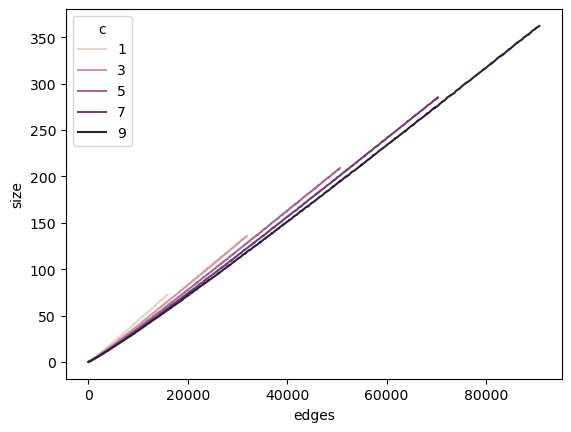

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
sns.lineplot(sparse_dataset,x=sparse_dataset["edges"],y=sparse_dataset["size"]/1024,ax=ax,hue="c")

In [414]:
X=sparse_dataset[["log n","c","n"]]
y=sparse_dataset["size"]/1024
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True)
model=Pipeline([("quadratic_transformation",PolynomialFeatures(degree=3)),("regression",linear_model.LinearRegression())])
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9999086558232444

In [415]:
S=[]
for z in range(2,100):
    i=z*z
    for j in range(1,11,2):
        for k in range(10):
            S.append({"n":i,"c":j,"log n":np.log10(i)})
S=pd.DataFrame(S,columns=["log n","c","n"])
model.predict(S).sum()/1024

324.37386280409487

In [263]:
S

,log n,c,n
0,1.0,1,4
1,1.0,1,4
2,1.0,1,4
3,1.0,1,4
4,1.0,1,4
...,...,...,...
4895,4.0,9,9801
4896,4.0,9,9801
4897,4.0,9,9801
4898,4.0,9,9801


In [285]:
dense_benchmark=pd.read_csv("/run/media/ramizouari/INTENSO/MPG/benchmark_gnp_random_mpg_dense.csv")
dense_benchmark["filename"]=dense_benchmark["filename"].map(lambda x : x.rstrip(".gpickle"))
dense_benchmark.sample(10)

,n,c,p,execution_start,execution_end,time,nodes,edges,distribution,filename
1708,676,68,0.10,2023-03-13 11:56:20.488761,2023-03-13 11:56:20.713225,0.224464,676,45671,"integers(-1,1)",gnp_uniform_mpg_676_68_8
301,36,4,0.10,2023-03-13 11:46:28.480378,2023-03-13 11:46:28.481603,0.001224,36,127,"integers(-1,1)",gnp_uniform_mpg_36_4_1
2088,961,769,0.80,2023-03-13 12:12:44.570678,2023-03-13 12:12:48.043280,3.472603,961,738630,"integers(-1,1)",gnp_uniform_mpg_961_769_8
1624,625,31,0.05,2023-03-13 11:54:29.072208,2023-03-13 11:54:29.174760,0.102551,625,19635,"integers(-1,1)",gnp_uniform_mpg_625_31_4
1815,729,729,1.00,2023-03-13 12:00:15.135757,2023-03-13 12:00:17.632182,2.496425,729,531441,"integers(-1,1)",gnp_uniform_mpg_729_729_5
290,36,2,0.05,2023-03-13 11:46:28.458863,2023-03-13 11:46:28.459911,0.001047,36,79,"integers(-1,1)",gnp_uniform_mpg_36_2_0
1981,900,90,0.10,2023-03-13 12:06:48.612347,2023-03-13 12:06:49.011231,0.398885,900,81023,"integers(-1,1)",gnp_uniform_mpg_900_90_1
1568,576,58,0.10,2023-03-13 11:53:02.293358,2023-03-13 11:53:02.557829,0.264470,576,33262,"integers(-1,1)",gnp_uniform_mpg_576_58_8
1089,289,58,0.20,2023-03-13 11:47:36.688563,2023-03-13 11:47:36.768930,0.080365,289,16815,"integers(-1,1)",gnp_uniform_mpg_289_58_9
1864,784,392,0.50,2023-03-13 12:01:18.585954,2023-03-13 12:01:20.031336,1.445382,784,307693,"integers(-1,1)",gnp_uniform_mpg_784_392_4


In [420]:
import os
import re
import pandas as pd
base_dir="/run/media/ramizouari/INTENSO/MPG/"
directory="/run/media/ramizouari/INTENSO/MPG/dataset/dense"
dense_dataset=[]
k=0
for file in os.listdir(directory):
    match=re.search(R"gnp_uniform_mpg_(\d+)_(\d+)_(\d+)(\.edgelist\.gz)",file)
    if match:
        n=int(match.group(1))
        c=int(match.group(2))
        extension=match.group(4)
        dense_dataset.append(dict(filename=match.group(0),size=os.path.getsize(os.path.join(directory,file))))
dense_dataset=pd.DataFrame(dense_dataset,columns=["filename","size"])
dense_dataset["filename"]=dense_dataset["filename"].map(lambda x : x.rstrip(".edgelist.gz"))
dense_dataset

,filename,size
0,gnp_uniform_mpg_4_2_0,89
1,gnp_uniform_mpg_4_2_1,93
2,gnp_uniform_mpg_4_2_2,96
3,gnp_uniform_mpg_4_2_3,82
4,gnp_uniform_mpg_4_2_4,96
...,...,...
2145,gnp_uniform_mpg_961_961_5,2308176
2146,gnp_uniform_mpg_961_961_6,2308999
2147,gnp_uniform_mpg_961_961_7,2308302
2148,gnp_uniform_mpg_961_961_8,2309124


In [421]:
dense_dataset=dense_dataset.merge(dense_benchmark,on="filename")


In [436]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

model=Pipeline([("scaler",StandardScaler()),("polynomial_features",PolynomialFeatures(degree=2,interaction_only=True)),("linear_regression",linear_model.Ridge(alpha=0.005))])
dense_dataset["log n"]=np.log10(dense_dataset["n"])
X=dense_dataset[["n","p","log n"]]
y=dense_dataset["size"]/1024
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True)
model=Pipeline([("quadratic_transformation",PolynomialFeatures(degree=3)),("regression",linear_model.LinearRegression())])
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9999688206035208

<Axes: xlabel='edges', ylabel='size'>

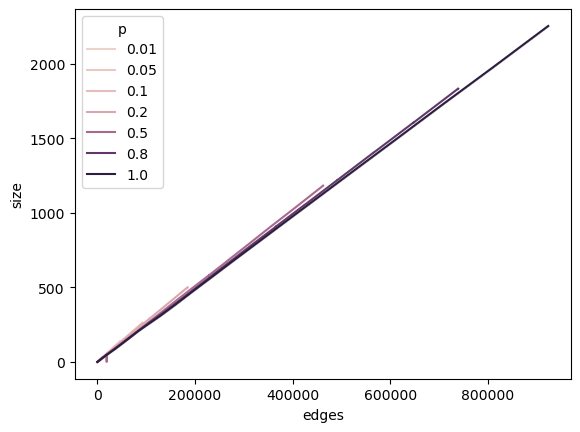

In [424]:
fig,ax=plt.subplots()
sns.lineplot(dense_dataset,x="edges",y=dense_dataset["size"]/1024,ax=ax,hue="p",legend="full")

In [457]:
S=[]
for i in range(2,1000):
    for j in [0.01,.05,.1,.2,.5,.8,1]:
        for k in range(10):
            S.append({"n":i,"p":j,"log n":np.log10(i)})
S=pd.DataFrame(S,columns=["n","p","log n"])
model.predict(S).sum()/1024

21799.22707562697